In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools



WARNING    "i" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 9. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


nr of spikes: 8
spikes times: [  36.9   71.1  105.3  139.5  173.7  207.9  242.1  276.3] ms


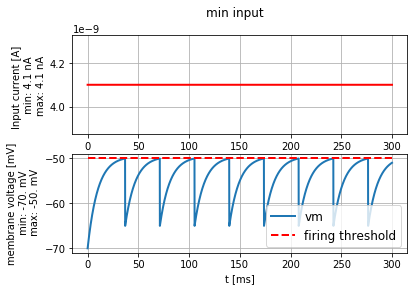

In [5]:
#Exercicio 1A
#Qual a mínima corrente aplicada necessária para que o neurônio produza disparos? 
# Calcule essa corrente usando a equação 2.11 do livro do Miller (ou equação 9 da aula 12 nas notas de aula)
# e depois simule o modelo com correntes aplicadas (i) ligeiramente menores e
# (ii) ligeiramente maiores que essa corrente mínima. Em cada caso, faça o gráfico do potencial de membrana, V(t), 
# por um intervalo de tempo de 200 ms (ou um intervalo entre disparos completo se este for mais longo). 

#Baseado na função simulate_LIF_neuron do arquivo LIF.py
"""Basic leaky integrate and fire neuron implementation.

Args:
    input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
    simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
    v_rest (Quantity): Resting potential: -70mV
    v_reset (Quantity): Reset voltage after spike - 65mV
    firing_threshold (Quantity) Voltage threshold for spiking -50mV
    membrane_resistance (Quantity): 10Mohm
    membrane_time_scale (Quantity): 8ms
    abs_refractory_period (Quantity): 2ms

Returns:
    StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
    SpikeMonitor: Biran2 SpikeMonitor
"""
v_rest= -70*b2.mV
v_reset= -65*b2.mV
membrane_resistance = 5 * b2.Mohm
membrane_capacitance = 2*b2.nF
firing_threshold = -50 * b2.mV

simulation_time = 300 
dt =  0.1 * b2.ms 

current = 4.1 * b2.namp


input_current = input_factory.get_step_current(
    t_start=0, t_end=simulation_time, unit_time=b2.ms,
    amplitude= current) 

# differential equation of Leaky Integrate-and-Fire model
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (input_current(t,i)/membrane_capacitance) ) : volt """

# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    1, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
    refractory=False, method="euler", dt = dt)
neuron.v = v_rest  # set initial value

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

graph_c, graph_c = plot_tools.plot_voltage_and_current_traces(
state_monitor, input_current, title="min input", firing_threshold=firing_threshold)
# for t in spike_monitor.t:
#    graph_c.axvline(t/b2.ms, ls='--', c='C1', lw=3)   
print("nr of spikes: {}".format(spike_monitor.count[0]))
print("spikes times: {}".format(spike_monitor.t[:]))


nr of spikes: <spikemonitor_1.count: array([ 15,  48,  58,  72,  83, 144, 159, 175, 188, 195])>
spikes times: [   12.     12.4    13.4 ...,  1990.8  1994.6  1997. ] ms


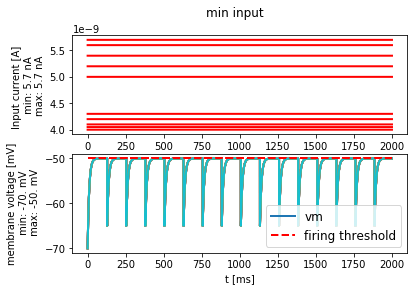

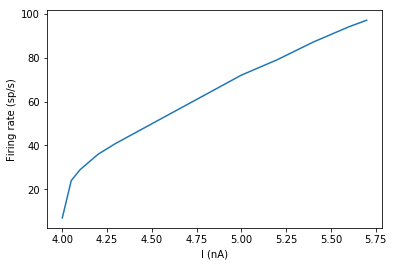

In [4]:
#exercicio 1B 
# Faça simulações com 10 valores diferentes de Iapp (todos acima da corrente mínima), 
# cada uma tendo 2 s de duração (vamos chamar cada simulações de um “teste”). 
# Para cada valor de corrente aplicada, faça o seu programa calcular a frequência média
# de disparos (f) do neurônio como o número de disparos durante a apresentação da corrente
# dividido pelo tempo em que ela é apresentada e, ao final, faça seu programa gerar o gráfico
# da frequência média de disparos versus a corrente aplicada (curva F-I) para o modelo. 
# Escolha valores de Iapp de maneira que as frequências f estejam no intervalo entre 0 e 100 Hz.

v_rest= -70*b2.mV
v_reset= -65*b2.mV
membrane_resistance = 5 * b2.Mohm
membrane_capacitance = 2*b2.nF
firing_threshold = -50 * b2.mV

simulation_time = 2
dt =  0.1 * b2.ms 
current = [4.00001, 4.05, 4.1, 4.2, 4.3, 5., 5.2, 5.4, 5.6, 5.7]

eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt 
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
    refractory=False, method="euler", dt = dt)
neuron.v = v_rest  # set initial value
neuron.current = current*b2.nA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

#plot
input_current = [None]*len(current)
for i in range(len(current)):
    input_current[i] = input_factory.get_step_current(
    t_start=0, t_end=simulation_time, unit_time=b2.second,
    amplitude= current[i]*b2.nA) 
    plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)

plt.figure(2)
print("nr of spikes: {}".format(spike_monitor.count))
print("spikes times: {}".format(spike_monitor.t[:]))
plt.plot(neuron.current /b2.nA, spike_monitor.count/simulation_time)
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.show()